In [666]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [667]:
df = pd.read_csv("D:/JUPYTER NOTEBOOK/100 DAYS OF Machine Learning/covid_toy.csv")

In [668]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [669]:
df.sample(5)

,age,gender,fever,cough,city,has_covid
3,31,Female,98.0,Mild,Kolkata,No
29,34,Female,NaN,Strong,Mumbai,Yes
51,11,Female,100.0,Strong,Kolkata,Yes
14,51,Male,104.0,Mild,Bangalore,No
60,24,Female,102.0,Strong,Bangalore,Yes


In [670]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [671]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        100 non-null    int64  
 1   gender     100 non-null    object 
 2   fever      90 non-null     float64
 3   cough      100 non-null    object 
 4   city       100 non-null    object 
 5   has_covid  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [672]:
df.describe()

,age,fever
count,100.000000,90.000000
mean,44.220000,100.844444
std,24.878931,2.054926
min,5.000000,98.000000
25%,20.000000,99.000000
50%,45.000000,101.000000
75%,66.500000,102.750000
max,84.000000,104.000000


In [673]:
df.shape

(100, 6)

In [674]:
df.duplicated().sum()

1

In [675]:
df.corr(numeric_only=True)

,age,fever
age,1.000000,-0.017828
fever,-0.017828,1.000000


<Axes: ylabel='Frequency'>

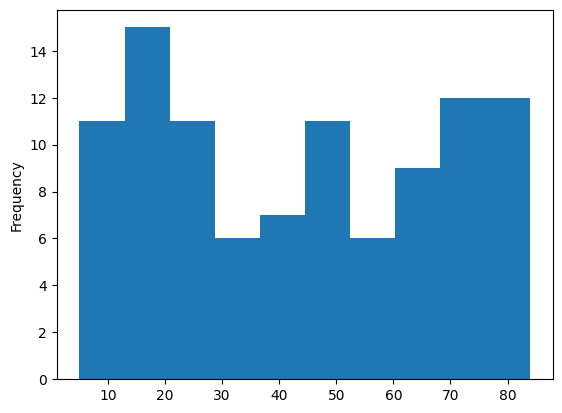

In [676]:
df['age'].plot(kind='hist')

<Axes: xlabel='count', ylabel='gender'>

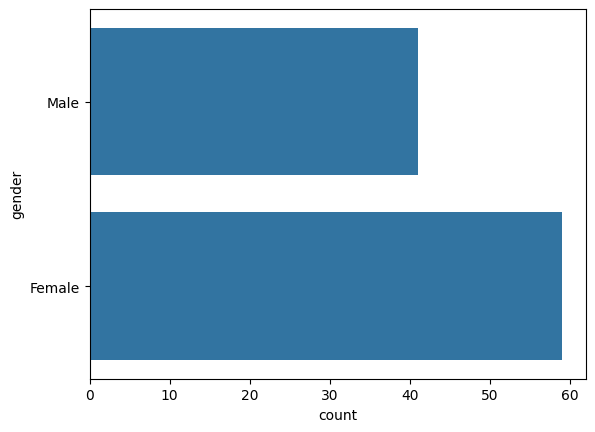

In [677]:
sns.countplot(df['gender'])

<Axes: xlabel='count', ylabel='has_covid'>

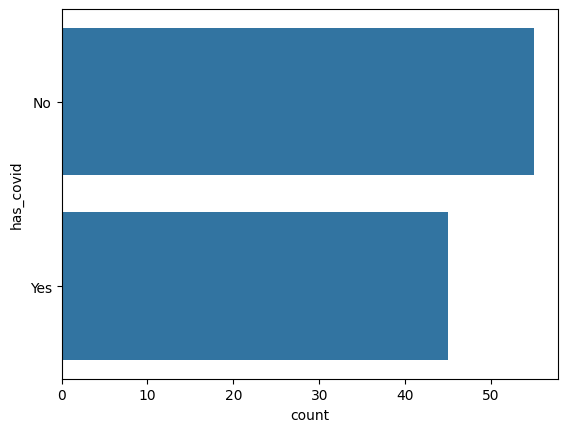

In [678]:
sns.countplot(df['has_covid'])

<Axes: ylabel='fever'>

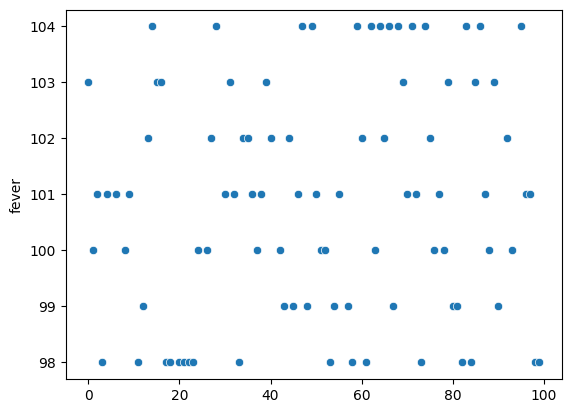

In [679]:
sns.scatterplot(df['fever'])

<Axes: xlabel='count', ylabel='cough'>

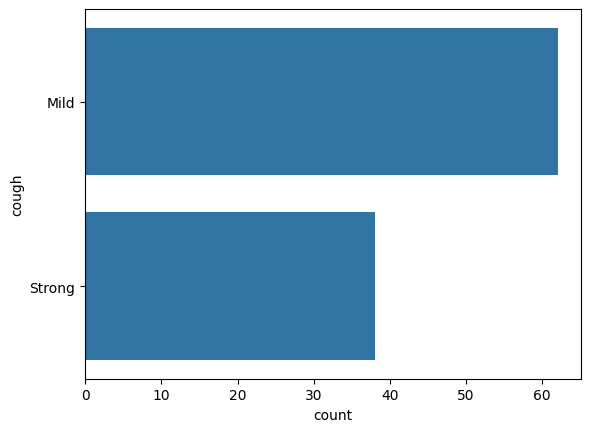

In [680]:
sns.countplot(df['cough'],)

<Axes: xlabel='count', ylabel='city'>

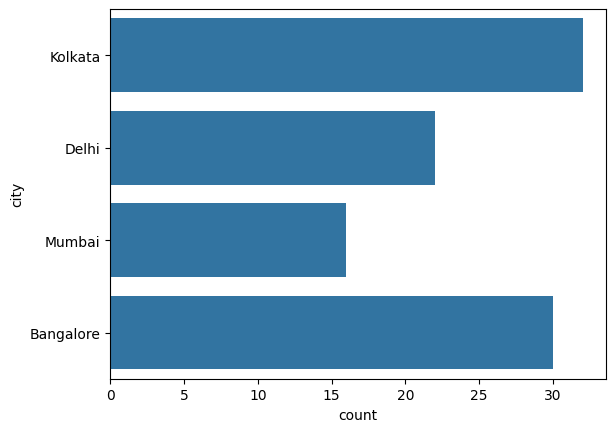

In [681]:
sns.countplot(df['city'])

<Axes: >

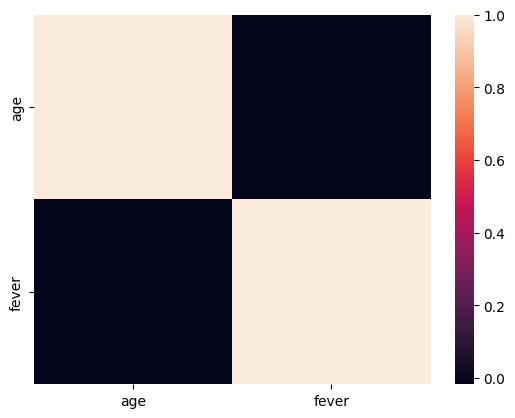

In [682]:
sns.heatmap(df.corr(numeric_only=True))

In [683]:
from sklearn.model_selection import train_test_split

In [684]:
df.head(1)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No


In [685]:
X= df[['age','gender','fever','cough','city']]
y=df[['has_covid']]

In [686]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=7)

In [687]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

In [688]:
trf1 = ColumnTransformer([ 
    ('gender_city_encode',OneHotEncoder(sparse_output=False,handle_unknown='ignore'),[1,3,4])],remainder='passthrough')    

In [689]:
trf2 = ColumnTransformer([
    ('fever_impute',SimpleImputer(),[2])],remainder='passthrough') 

In [690]:
# trf3 = ColumnTransformer([
    # ('cough_encode',OrdinalEncoder(categories=[['Mild','Strong']]),[3])],remainder='passthrough')

In [691]:
trf4 = ColumnTransformer([
    ('scale',StandardScaler(),slice(0,11))],remainder='passthrough')

In [692]:
trf5 = DecisionTreeClassifier()

In [693]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    # ('trf3',trf3),
    ('trf4',trf4),
    ('trf5',trf5)
])

In [694]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('gender_city_encode',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [1, 3, 4])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fever_impute',
                                                  SimpleImputer(), [2])])),
                ('trf4',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scale', StandardScaler(),
                                                  slice(0, 11, None))])),
                ('trf5', DecisionTreeClassifier())])

In [695]:
y_pred = pipe.predict(X_test)

In [696]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.6
